# Project 6
## livia Boise and Sebastian Flores

# Introduction
As students, our goal is to learn in order to recieve good grades, but is receiving good grades that simple? Are there other factors that effect a student's academic performance? This question is important because students have always been evaluated by their academic performance. A student's evaluation is especially important when they are applying to colleges. We want to see how a students' environment and habits effects their academic performance. Ultimately we want to be able to predict how a student will perform based on their environment and habits. The input to our algorithm was both numbers and strings representing different aspects of the student's home-life, socioeconomic status, and lifestyle. For example, we examine the student's family size, parents' professions, and amount of free time as features. We then used Decision Trees, Neural Networks, and Naive Bayes to output a predicted final grade.

# Related Work
We did find a project that was related to our topic. A study conducted by Paulo Cortez and Alice Silva was done on predicting student performance. They used the dataset we are using that contains the math scores of a students in Portugal and plenty of other features. They wanted to identify which key variables affect educational success/failure, as well as predicting a students achievement. They used binary classification, 5-level classification, and regression. Our work is more focused on being able to predict a students achievement. However, we will also be using regression to predict a student's academic performance.

# Dataset
We have a total of 395 rows of data that we could use for training and testing purposes. We intend on using 20% of those examples for testing and 80% for training. We did have to do some preprocessing on our dataset.
<br>
This is the citation for our dataset: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. http://www3.dsi.uminho.pt/pcortez/student.pdf

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files

#this commented line of code allows for the Google Colab notebook to select
#file it is reading from and only needs to be run the first time the notebook is 
#being run as a whole

#uploaded = files.upload()
df = pd.read_csv('student-mat.csv', sep=';')
df

Saving student-mat.csv to student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# Displaying the categories in this feature
df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: G3, dtype: int64

In [ ]:
# Showing summary of all numerical attributes
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


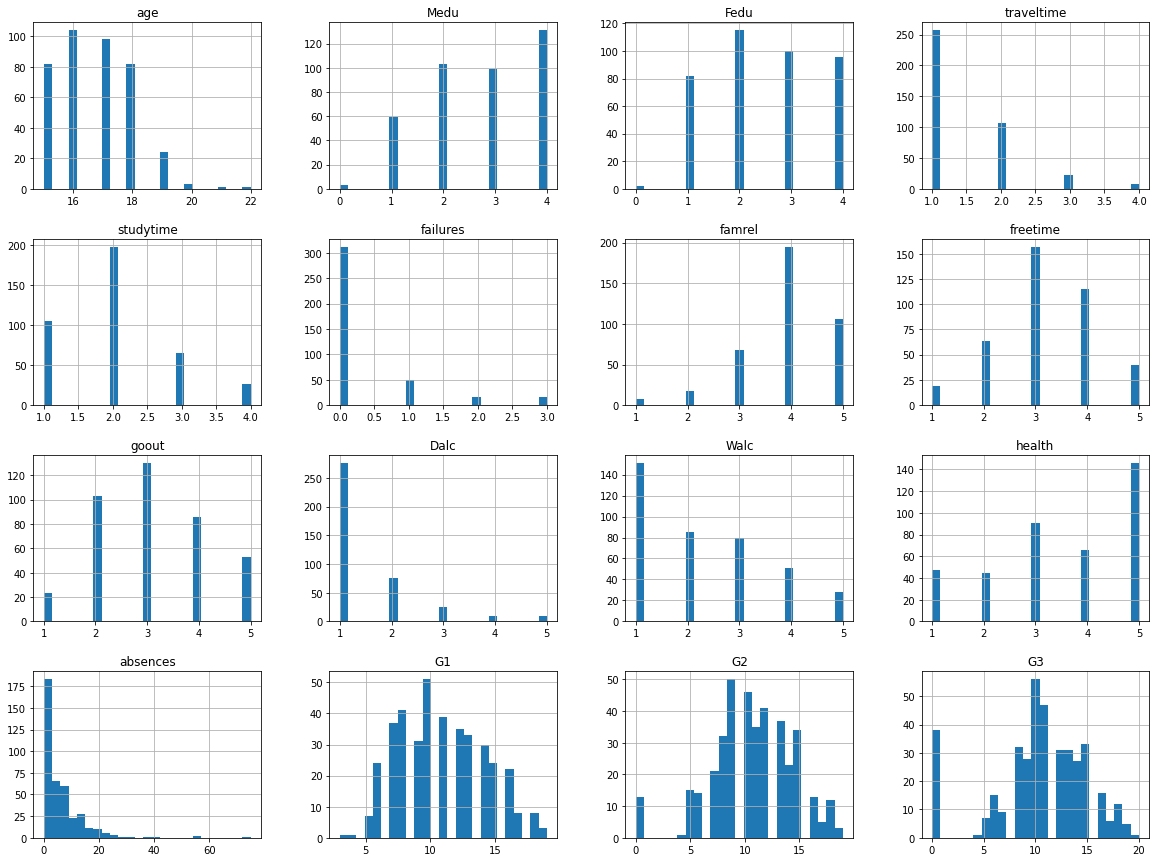

In [ ]:
%matplotlib inline
# checking the graphical rep of the dataset
df.hist(bins=25, figsize=(20,15))
plt.show()

In [ ]:
# Creating Training and Testing data
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(df, test_size=0.2, random_state=2)

In [ ]:
# Feature Correlation
corr_matrix=train_set.corr()
corr_matrix['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.901592
G1            0.791577
Medu          0.206622
Fedu          0.144048
studytime     0.107097
famrel        0.030208
absences      0.012120
freetime     -0.015782
health       -0.070737
Walc         -0.077326
Dalc         -0.078617
goout        -0.115621
traveltime   -0.133143
age          -0.184686
failures     -0.323661
Name: G3, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

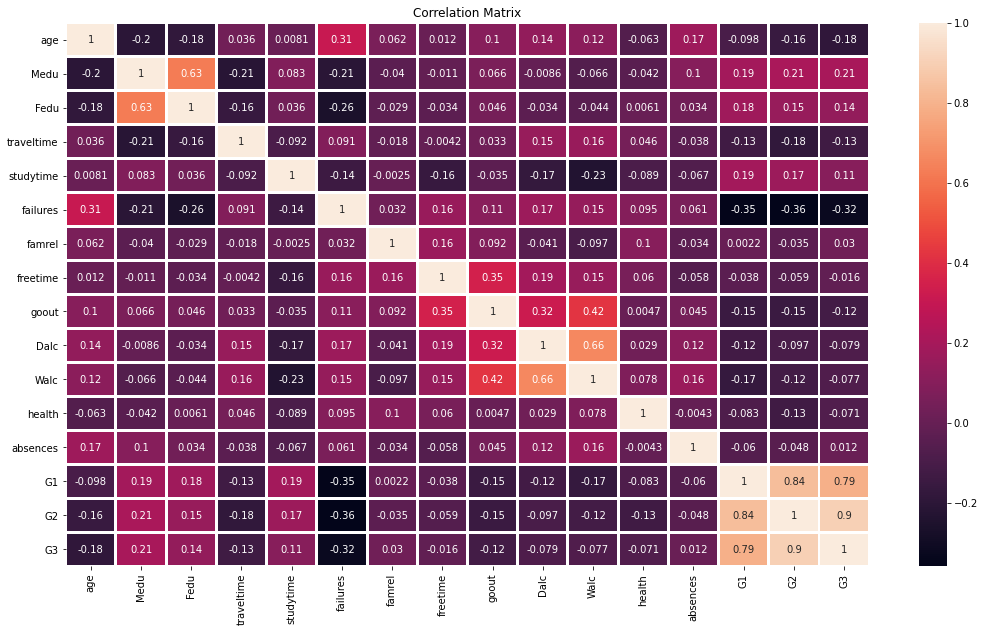

In [ ]:
# correlation visualization
import seaborn as sns 
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix, linewidths=2.0,ax=ax,annot=True)
ax.set_title('Correlation Matrix')

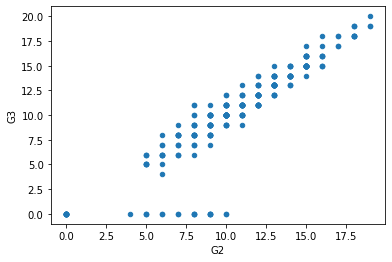

In [ ]:
# Second Semester grades appear to correlate the most with final grades
train_set.plot(kind='scatter', x='G2', y='G3')

# Preparing Data
We luckily did not have to do any scaling but we had to do a bit of encoding. We used ordinal encoding since most of the data features are binary. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
result = encoder.fit_transform(df)
result_df = pd.DataFrame(result, columns=list(train_set.columns))
result_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0.0,0.0,3.0,1.0,0.0,0.0,4.0,4.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,3.0,0.0,0.0,2.0,6.0,2.0,3.0,3.0
1,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,0.0,0.0,2.0,4.0,2.0,2.0,3.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,2.0,1.0,1.0,2.0,2.0,10.0,4.0,5.0,7.0
3,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,4.0,2.0,12.0,11.0,12.0
4,0.0,0.0,1.0,1.0,0.0,1.0,3.0,3.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,0.0,1.0,4.0,4.0,3.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,5.0,1.0,1.0,0.0,2.0,2.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,3.0,4.0,3.0,11.0,6.0,6.0,6.0
391,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,4.0,2.0,3.0,1.0,3.0,11.0,13.0,13.0
392,1.0,1.0,6.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,7.0,5.0,4.0
393,1.0,1.0,3.0,0.0,1.0,1.0,3.0,2.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,0.0,2.0,3.0,4.0,0.0,8.0,9.0,7.0


In [ ]:
# Making sure data was encoded
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    float64
 1   sex         395 non-null    float64
 2   age         395 non-null    float64
 3   address     395 non-null    float64
 4   famsize     395 non-null    float64
 5   Pstatus     395 non-null    float64
 6   Medu        395 non-null    float64
 7   Fedu        395 non-null    float64
 8   Mjob        395 non-null    float64
 9   Fjob        395 non-null    float64
 10  reason      395 non-null    float64
 11  guardian    395 non-null    float64
 12  traveltime  395 non-null    float64
 13  studytime   395 non-null    float64
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    float64
 16  famsup      395 non-null    float64
 17  paid        395 non-null    float64
 18  activities  395 non-null    float64
 19  nursery     395 non-null    f

In [ ]:
# Showing new summary of data
result_df.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.116456,0.473418,1.696203,0.777215,0.288608,0.896203,2.749367,2.521519,2.169620,2.281013,1.255696,0.853165,0.448101,1.035443,0.334177,0.129114,0.612658,0.458228,0.508861,0.794937,0.949367,0.832911,0.334177,2.944304,2.235443,2.108861,0.481013,1.291139,2.554430,5.427848,7.908861,7.812658,7.703797
std,0.321177,0.499926,1.276043,0.416643,0.453690,0.305384,1.094735,1.088201,1.227473,0.863542,1.208236,0.536684,0.697505,0.839240,0.743651,0.335751,0.487761,0.498884,0.500555,0.404260,0.219525,0.373528,0.472300,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,6.450651,3.319195,3.509283,3.968257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,5.000000,6.000000,5.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,1.000000,3.000000,4.000000,8.000000,8.000000,8.000000
75%,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,8.000000,10.000000,10.000000,11.000000
max,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,33.000000,16.000000,16.000000,17.000000


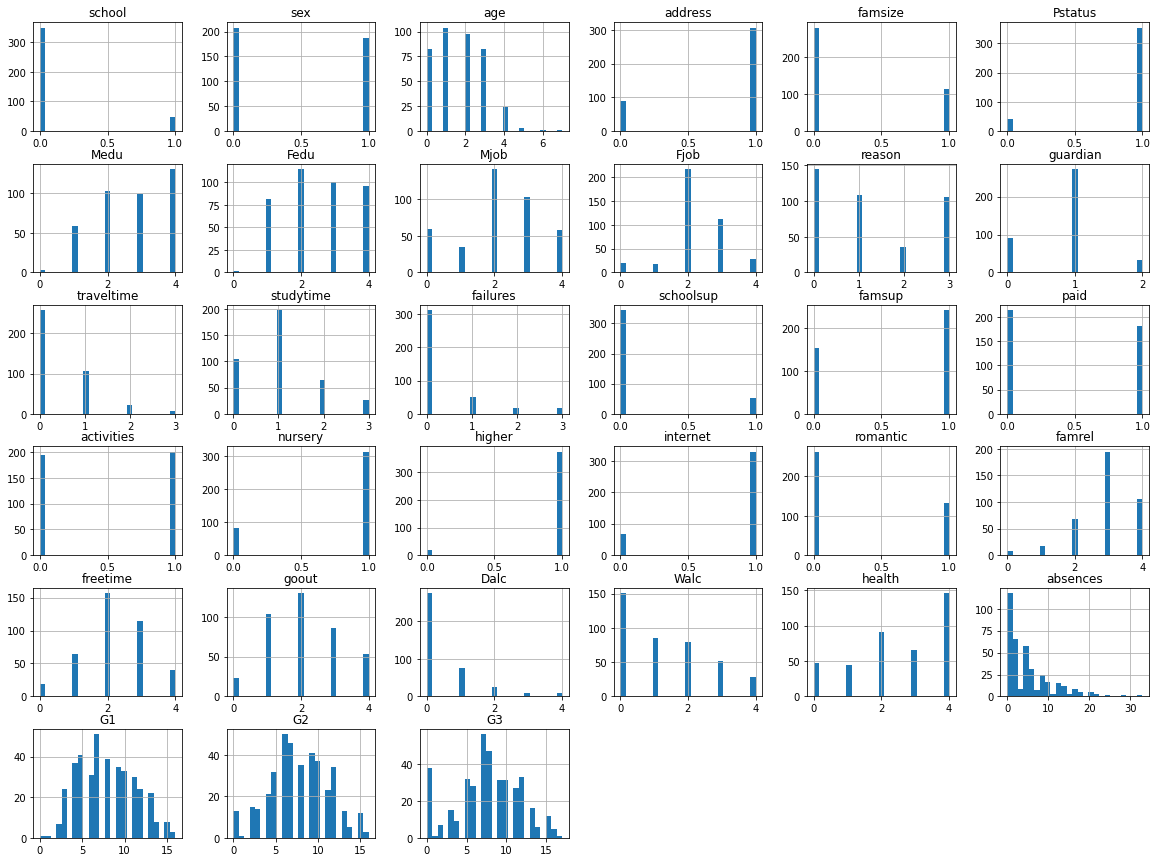

In [ ]:
# Showing histograms of new data
result_df.hist(bins=25, figsize=(20,15))
plt.show()

# Methods
One of the learning algorithms that we used was a Decision Tree because in order to predict the student's final grade it was a classification problem instead of a regression problem. Seeing as the dataset only allows a final grade that is an integer between 1 and 20 there are only a discrete number of predictions the model can make. Decision Trees work by calculating the information gained by each of the dataset's features. The tree will then split on the feature that provides the highest information gained. The leaf nodes of the tree will present the predicts based on how the input navigated through the various branches of the tree. 

Another method that was we used was Multi-Layer Percpetron Neural Network. Multi-Layer Perceptrons work with a series of hidden layers that all operate in the same way that a singular perceptron does. Perceptrons work by recieving input from the features and calculate an output based upon the assigned weights that each edge contains. The perceptron either fires if the weight * the input is greater than 1 and doesn't fire if that value is less than 1.

The last method of classification that was used was Naive Bayes and we experimented using the Gaussian, Bernoulli, and Multinomial classifiers. Naive Bayes works by calculating the probability of specific set of input features returning a specific output class. These three categories of Naive Bayes models differ in their approach to accounting for the type of feature data and how often occurances of the same feature data occur.

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

result_df_features = result_df.iloc[:,:-1]
result_df_target = result_df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(result_df_features, result_df_target, test_size=0.2, train_size=0.8, random_state=42)

# Experiments, Results, and Discussion
For each of the 5 following experiments using a Decision Tree, Multi-Layer Perceptron, Gaussian Naive Bayes, Bernoulli Naive Bayes, and Multinomial Naive Bayes k-fold cross validation was used with a k = 5 to minimize data bias. Our primary metrics of evalution for these models are accuracy (which can be seen in the following as cross validation average score), precision, and recall. Accuracy measures the percentage of correct predictions the model makes out of correct predictions and in cross validation we are taking the average accuracy of each of the 5 tests. Precision measures the percentage of true positives of all of the predicted positives. Recall measures the percentage of true positives of all of the actual positives. Seeing as this is a multi-label classification problem both the precision and recall values needed to be definied as weighted to account for the true instances of the label. 

## Decision Tree

In [ ]:
#DecisionTree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

cv_pred = cross_val_predict(tree, X_test, y_test, cv=5)
cv_score = cross_val_score(tree, X_test, y_test, cv=5)
dcv_avg = np.mean(cv_score)

dprecision = precision_score(y_test, cv_pred, average='weighted')
drecall = recall_score(y_test, cv_pred, average='weighted')

print("Cross validiation average score: ",dcv_avg)
print("Precision score: ", dprecision)
print("Recall score: ", drecall)

Cross validiation average score:  0.38083333333333336
Precision score:  0.39015151515151514
Recall score:  0.4177215189873418


## Multi-Layer Perceptron

In [ ]:
#Multi-Layer Perceptron
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

cv_pred = cross_val_predict(mlp, X_test, y_test, cv=5)
cv_score = cross_val_score(mlp, X_test, y_test, cv=5)
mlcv_avg = np.mean(cv_score)

mlprecision = precision_score(y_test, cv_pred, average='weighted')
mlrecall = recall_score(y_test, cv_pred, average='weighted')

print("Cross validiation average score: ",mlcv_avg)
print("Precision score: ", mlprecision)
print("Recall score: ", mlrecall)

Cross validiation average score:  0.22833333333333333
Precision score:  0.23544303797468355
Recall score:  0.21518987341772153


## Naive Bayes
### Gaussian

In [ ]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

cv_pred = cross_val_predict(gnb, X_test, y_test, cv=5)
cv_score = cross_val_score(gnb, X_test, y_test, cv=5)
gcv_avg = np.mean(cv_score)

gprecision = precision_score(y_test, cv_pred, average='weighted')
grecall = recall_score(y_test, cv_pred, average='weighted')

print("Cross validiation average score: ",gcv_avg)
print("Precision score: ", gprecision)
print("Recall score: ", grecall)

Cross validiation average score:  0.08833333333333333
Precision score:  0.0970464135021097
Recall score:  0.08860759493670886


### Bernoulli

In [ ]:
#Bernoulli NB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

cv_pred = cross_val_predict(bnb, X_test, y_test, cv=5)
cv_score = cross_val_score(bnb, X_test, y_test, cv=5)
bcv_avg = np.mean(cv_score)

bprecision = precision_score(y_test, cv_pred, average='weighted')
brecall = recall_score(y_test, cv_pred, average='weighted')

print("Cross validiation average score: ",bcv_avg)
print("Precision score: ", bprecision)
print("Recall score: ", brecall)

Cross validiation average score:  0.13833333333333334
Precision score:  0.15009457296668122
Recall score:  0.13924050632911392


### Multinomial Naive Bayes

In [ ]:
#Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

cv_pred = cross_val_predict(mnb, X_test, y_test, cv=5)
cv_score = cross_val_score(mnb, X_test, y_test, cv=5)
mucv_avg = np.mean(cv_score)

muprecision = precision_score(y_test, cv_pred, average='weighted')
murecall = recall_score(y_test, cv_pred, average='weighted')

print("Cross validiation average score: ",mucv_avg)
print("Precision score: ", muprecision)
print("Recall score: ", murecall)

Cross validiation average score:  0.17916666666666664
Precision score:  0.1962025316455696
Recall score:  0.17721518987341772


## Comparing Metrics of All Models

In [ ]:
table = pd.DataFrame(np.array([[dcv_avg, mlcv_avg, gcv_avg, bcv_avg, mucv_avg],[dprecision, mlprecision, gprecision, bprecision, muprecision], [drecall, mlrecall, grecall, brecall, murecall]]), columns=['Decision Tree', 'Perceptron', 'Gaussian NB', 'Bernoulli NB', 'Multinomial NB'])
table.index = ['Accuracy', 'Precision', 'Recall']
print(table)

           Decision Tree  Perceptron  Gaussian NB  Bernoulli NB  Multinomial NB
Accuracy        0.380833    0.228333     0.088333      0.138333        0.179167
Precision       0.390152    0.235443     0.097046      0.150095        0.196203
Recall          0.417722    0.215190     0.088608      0.139241        0.177215


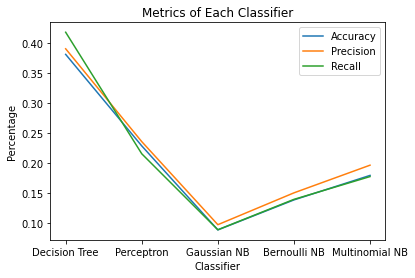

In [ ]:
plt.plot(table.iloc[0], label="Accuracy")
plt.plot(table.iloc[1], label="Precision")
plt.plot(table.iloc[2], label="Recall")
plt.title("Metrics of Each Classifier")
plt.xlabel("Classifier")
plt.ylabel("Percentage")
plt.legend()
plt.show()

One challenge that could account for somewhat low accuracy, precision, and recall metrics could be a imbalance of classes in the training data. For instance very few of the indexes in the original dataset had final grades below a 4 or above a 17. This meant that the models could not identify these instances as easily and therefore were potentially not as readily able to predict this scores that are on the either end of the 1 to 20 spectrum. Additionally having a classification problem with 20 different labels has the potential to produce inherently lower metrics than a binary classification problem because it is more likely for a model to make an incorrect predicition when there are 19 incorrect predictions that a model could make.

It is clear based on both the table and figure of displaying the metrics that the highest performing classifier was the Decision Tree while the Gaussian Naive Bayes model was the worst performing.

# Conclusion
The highest performing model on the student's perfomance dataset was the decision tree classifier. It is likely that this was the case because the dataset had approximately 30 features therefore making it important for the model to quickly determine which feature would present the most information gained. According to the correlation matrix presented above, this feature was the student's grades from the second half of the semester which was likely the first feature that the model split on.

With the other classifiers analyzed above all of the dataset's features are taken into account, but the decision tree classifier prioritizes which features present the most information. This allowed it ultimately create more accurate and precise predictions.

If given more time to work on this assignment it would be interested to explore classifiers that were not presented to us in class. Due to the time frame of the assignment it made the most sense to us to utilize classifiers that we were already familiar with in order to be able to understand what the algorithms were doing to create the data model. Perhaps we would have been able to utilize a classifier that was able to more accurately predict outcomes for our dataset than the Decision Tree.

# Contributions
Sebastian worked on the Introduction, Related Works, Examining the dataset, and preprocessing the data. Olivia worked on the Methods, Experiments, Discussion, and Conclusion.